# Local Sums



## Local Sums in arbitrary categories

We defined local sums in arbitrary categories. 
The requirement we have is that addition distributes over composition.
First we define some objects and arrows:

In [1]:
from discopy.cat import LocalSum, Ob, Box, Arrow
from typing import List, Callable

x, y, z = Ob('x'), Ob('y'), Ob('z')
f = Box('f', x, y)
g = Box('g', x, y)
h = Box('h', y, z)


We can add boxes as follows and then compose them on both sides:

In [2]:
fg = LocalSum([f, g]) 
print("This is the sum:", fg)
k = fg >> h
print("With composition from the right:", k)
l= Box("h'", z, x) >> fg
print("With composition from the left:", l)

This is the sum:  ((f) + (g)) 
With composition from the right:  ((f) + (g))  >> h
With composition from the left: h' >>  ((f) + (g)) 


The addition does distribute over composition. You can distribute to the left and to the right.
This implementation is neither memory efficient nor very nice to look at.
But it seems to work for now.

In [3]:
from discopy.localsum_rewriting import distribute_composition_cat

print(distribute_composition_cat(l, 1, 0))
print(distribute_composition_cat(k, 0, 1))


 ((h' >> f) + (h' >> g)) 
 ((f >> h) + (g >> h)) 


This also works for larger arrows, where we do not want to distribute the entire way and in both directions:

In [4]:
diag = Box("a", x, y) >> Box("b", y, x) >> LocalSum([Box("c", x, z), Box("d", x, z)]) >> Box("e", z, y)>> Box("f", y, y)>> Box("g", y, x)
print(diag)
print(distribute_composition_cat(diag, 2, 1))
print(distribute_composition_cat(diag, 2, 4))

a >> b >>  ((c) + (d))  >> e >> f >> g
a >>  ((b >> c) + (b >> d))  >> e >> f >> g
a >> b >>  ((c >> e >> f) + (d >> e >> f))  >> g


Undoing distribution is not supported directly, since for this to work all terms of the sum need to have some part in common.
So we use this method for reverting the distribution. 

In [5]:
# TODO: actually build the thing

## Local Sums in monoidal categories

For categories with a monoidal structure the addition will distribute over the monoidal product iff the category admits arbitrary biproducts.
We basically have that for arrows $A,B,C$ we get $A \otimes (B + C) = (A \otimes B ) + (A \otimes C)$

If this is given one may use the following function to pull parts of the diagram in and out of a sum.



In [6]:
from discopy.monoidal import LocalSum, Ob, Box, Diagram, Ty, Id

x, y, z = Ty('x'), Ty('y'), Ty('z')
f = Box('f', x, y)
g = Box('g', x, y)
h = Box('h', y, z)

 ((f) + (g))  @ Id(y) >> Id(y) @ h
 ((f) + (g))  @ Id(y) >> Id(y) @ h
[LocalSum([Box('f', Ty('x'), Ty('y')), Box('g', Ty('x'), Ty('y'))]), Box('h', Ty('y'), Ty('z'))]
y @ z
f @ Id(x @ y @ x) >> Id(y) @  ((f) + (g))  @ Id(y @ x) >> Id(y @ y) @ h @ Id(x) >> Id(y) @ t @ Id(x) >> Id(y) @ f @ Id(x) >> Id(y @ y) @ g


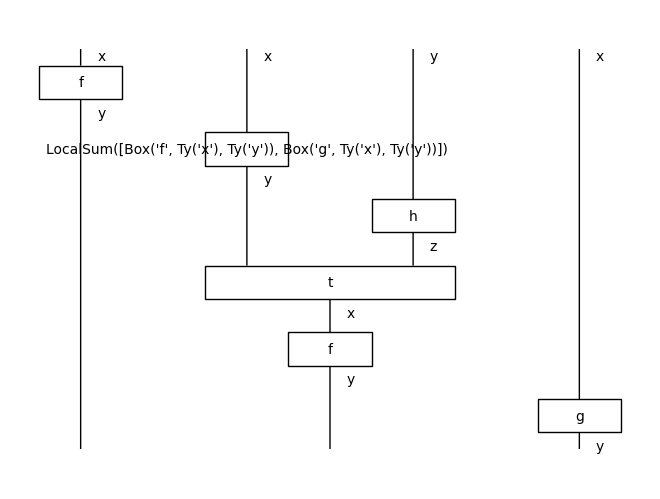

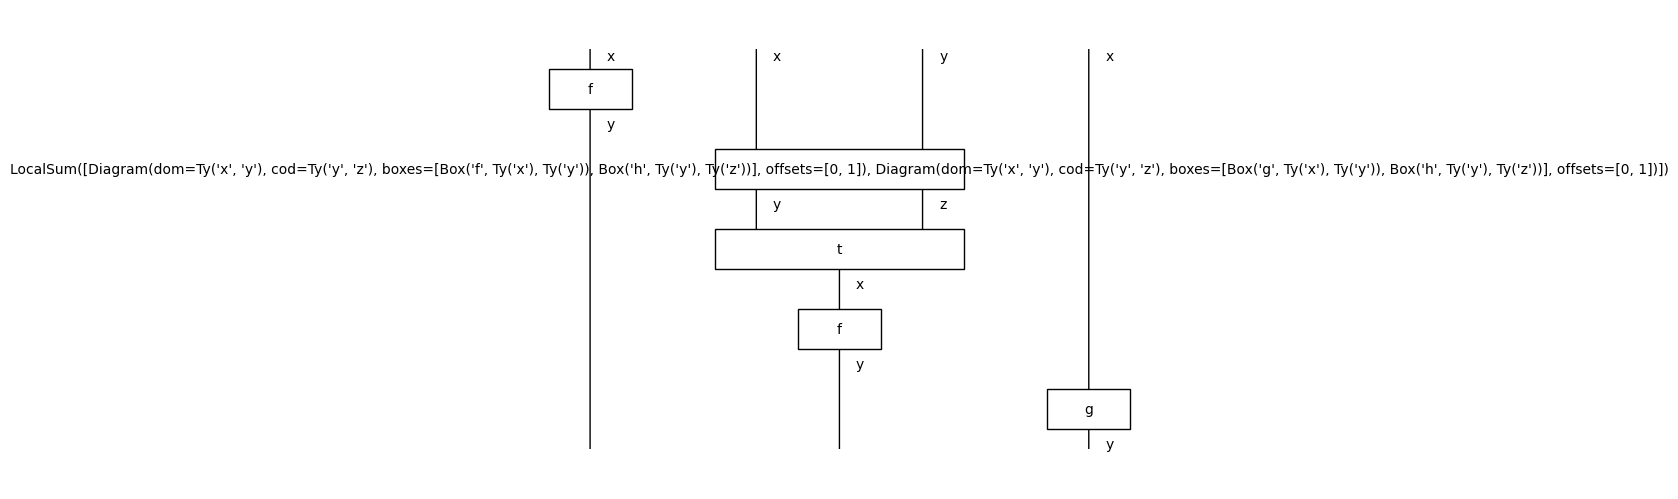

In [7]:
from discopy import rewriting
from discopy.drawing import diagram2nx
import networkx as nx

from discopy.localsum_rewriting import distribute_tensor

diag = LocalSum([f, g]) @ h
print(diag)
print(diag.layers)
print(diag.boxes)
print(diag.cod)
diag = f @ (diag >> Box("t", y @ z, x) >> f) @ g
diag = diag.normal_form()
print(diag)
diag.draw()
diag = distribute_tensor(diag, 1, 2)

diag.draw()


Unfortunatly as of now drawing does not work correctly, as you may have noticed above and can again see below:

a >> b >>  ((c) + (d))  >> e >> f >> g


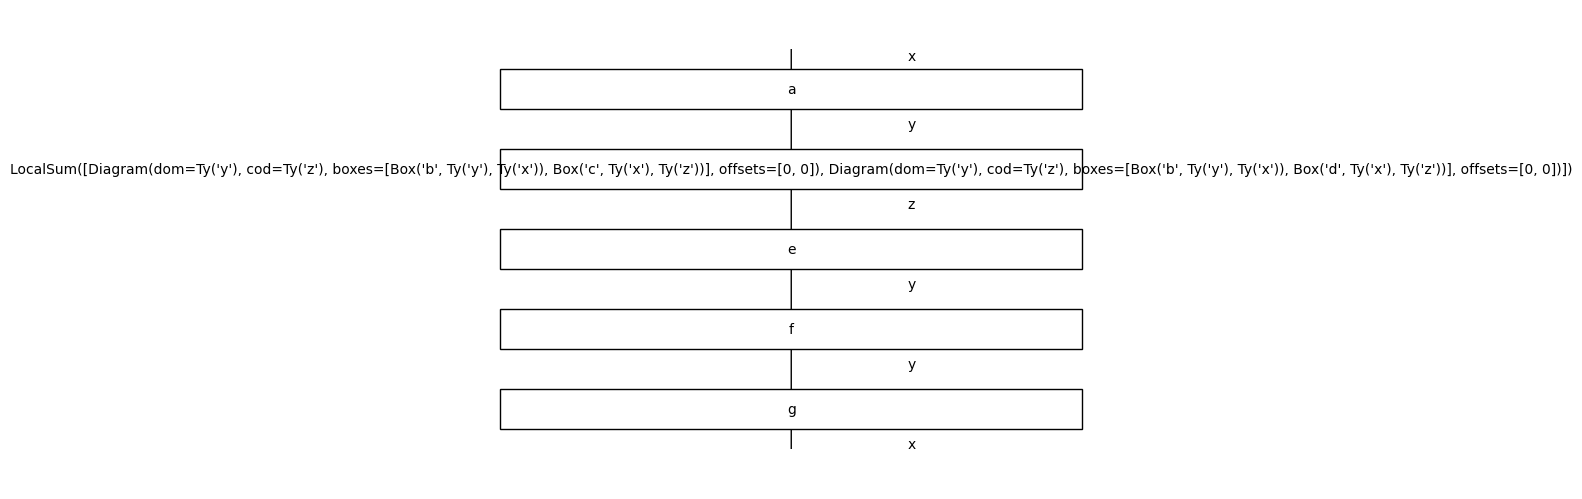

In [8]:
from discopy.localsum_rewriting import distribute_composition_monoidal
diag = Box("a", x, y) >> Box("b", y, x) >> LocalSum([Box("c", x, z), Box("d", x, z)]) >> Box("e", z, y)>> Box("f", y, y)>> Box("g", y, x)
print(diag)
distribute_composition_monoidal(diag, 2, 1).draw()

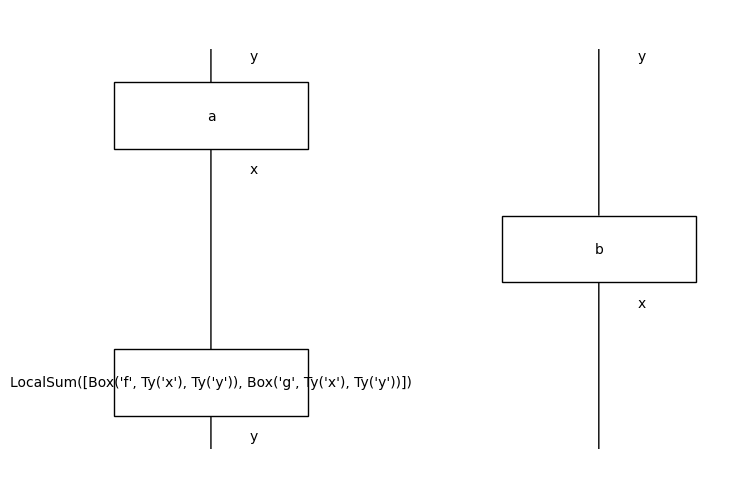

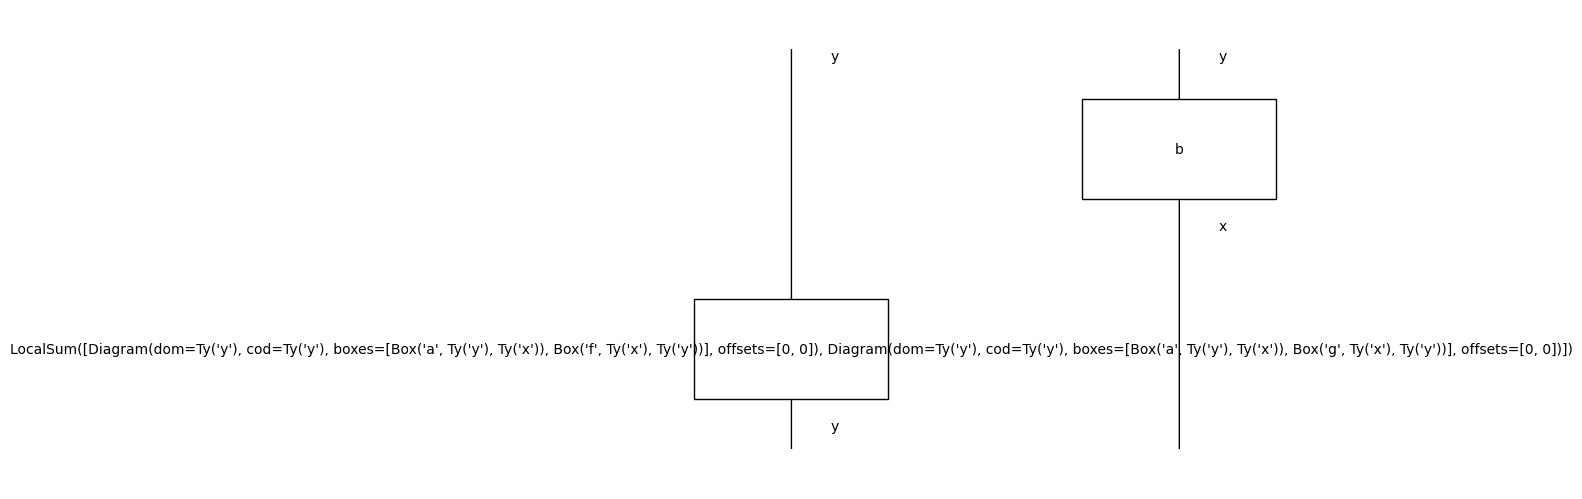

In [9]:
diag = (Box("a", y, x) @ Box("b", y, x)) >> ( LocalSum([f, g]) @Id(x) )
diag.draw()
diag = distribute_composition_monoidal(diag, 2, 0)
diag.draw()

candidates [(24, 21), (25, 22)]
edges_to_add [(21, 27), (24, 17), (22, 28), (25, 18)]
edges_to_remove [(24, 27), (21, 17), (25, 28), (22, 18)]
spider_simp: 10. 9. 6. 1.  4 iterations
id_simp: 3. 1.  2 iterations
Before the bialg replace


unspidered the thing


After the bialg replace


After clifford_simp


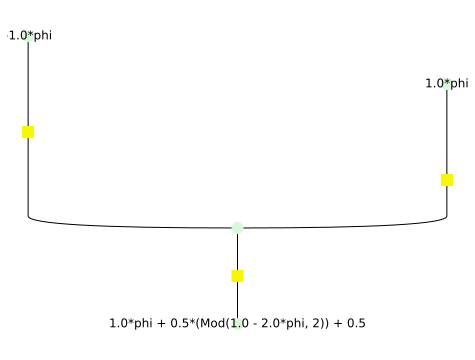

Before the bialg replace


unspidered the thing


After the bialg replace


After clifford_simp


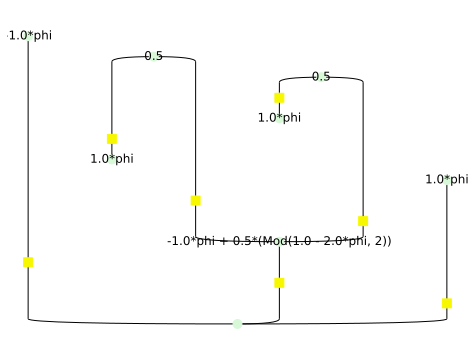

Before the bialg replace


unspidered the thing


After the bialg replace


After clifford_simp


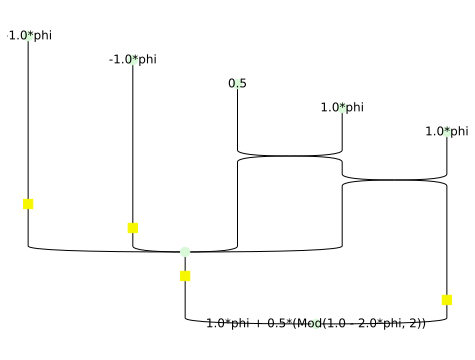

Before the bialg replace


unspidered the thing


After the bialg replace


After clifford_simp


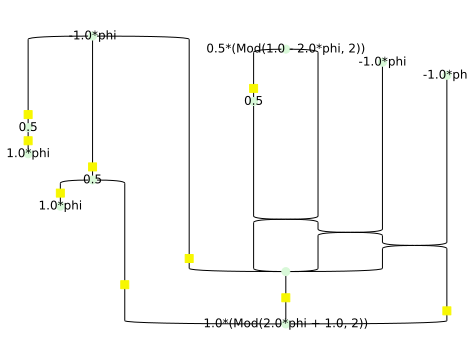

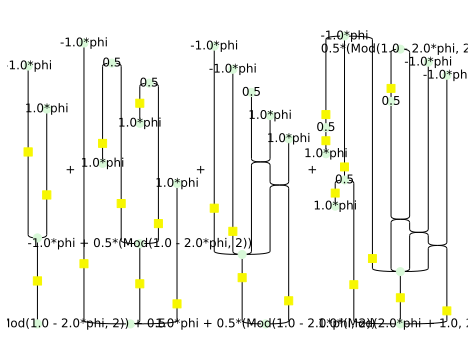

candidates [(24, 21), (25, 22)]
edges_to_add [(21, 27), (24, 17), (22, 28), (25, 18)]
edges_to_remove [(24, 27), (21, 17), (25, 28), (22, 18)]
spider_simp: 10. 9. 6. 1.  4 iterations
id_simp: 3. 1.  2 iterations
Before the bialg replace


unspidered the thing


After the bialg replace


After clifford_simp


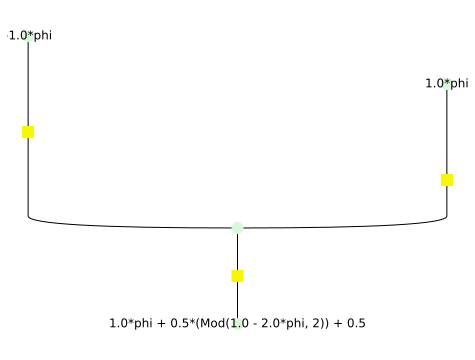

Before the bialg replace


unspidered the thing


After the bialg replace


After clifford_simp


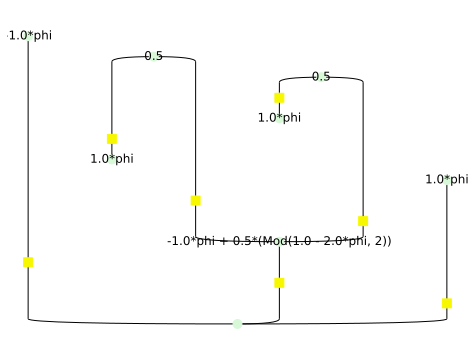

Before the bialg replace


unspidered the thing


After the bialg replace


After clifford_simp


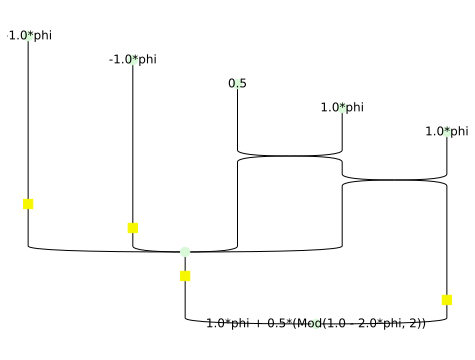

Before the bialg replace


unspidered the thing


After the bialg replace


After clifford_simp


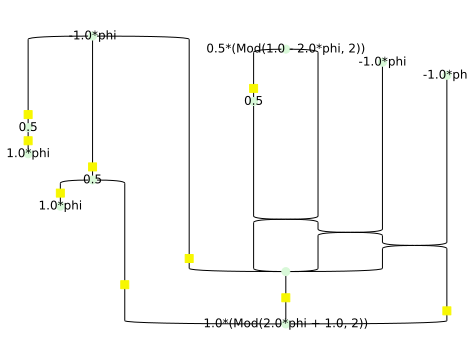

In [1]:
from discopy.quantum.rewrite_qaoa import simplify_qaoa
from t import get_graph
from sympy.abc import phi, beta

a = get_graph(beta, phi)
#b = a.to_pyzx()
#c = b.to_tikz()
#with open("a", "w") as f:
#    f.write(c)
#print(c)
b = simplify_qaoa(a, beta, phi)